In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.
Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
df_train = pd.read_csv("/resources/data/brainwaves/predict_fraudulant/train.csv")
df_test =  pd.read_csv("/resources/data/brainwaves/predict_fraudulant/test.csv")

df_train

,transaction_id,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,cat_var_1,cat_var_2,...,cat_var_34,cat_var_35,cat_var_36,cat_var_37,cat_var_38,cat_var_39,cat_var_40,cat_var_41,cat_var_42,target
0,id_11,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
1,id_33,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
2,id_51,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,gf,ce,...,0,0,0,0,0,0,0,0,0,0
3,id_54,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,NaN,ce,...,0,0,0,0,0,0,0,0,0,0
4,id_62,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,da,tn,...,0,0,0,0,0,0,0,0,0,0
5,id_67,1.953947e-07,0.078566,0.0,3.550000e-07,4.671053e-08,4.407895e-08,9.463310e-08,gf,ce,...,0,0,0,0,0,0,0,0,0,0
6,id_71,1.736842e-07,0.600508,0.0,4.575000e-06,5.986842e-07,1.736842e-07,8.411831e-08,hn,ce,...,0,0,0,0,0,0,0,0,0,0
7,id_88,5.789474e-08,0.152374,0.0,2.105000e-06,2.769737e-07,5.789474e-08,2.453451e-08,da,tn,...,0,0,0,0,0,0,0,0,0,0
8,id_95,3.289474e-08,0.093053,0.0,7.500000e-07,8.223684e-08,9.868421e-08,1.274520e-08,pu,ce,...,0,0,0,0,0,0,0,0,0,0
9,id_97,5.500000e-07,0.158401,0.0,2.105000e-06,2.769737e-07,5.500000e-07,3.138505e-07,da,tn,...,0,0,0,0,0,0,0,0,0,0


## Description

In [3]:
#describing train dataset
#describing numerical columns
des=df_train.describe(include=[np.number])
des=des.T
des

,count,mean,std,min,25%,50%,75%,max
num_var_1,348978.0,0.000021,0.001931,0.000000e+00,4.605263e-08,1.802632e-07,6.513158e-07,0.542763
num_var_2,348978.0,0.160586,0.131499,3.172253e-04,8.451412e-02,1.015121e-01,1.608332e-01,1.000000
num_var_3,348978.0,0.000011,0.002538,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.758621
num_var_4,348978.0,0.000046,0.002000,4.000000e-08,3.550000e-07,1.875000e-06,2.105000e-06,0.375000
num_var_5,348978.0,0.000008,0.000721,0.000000e+00,4.671053e-08,2.598684e-07,2.769737e-07,0.217105
num_var_6,348978.0,0.000015,0.001493,0.000000e+00,4.407895e-08,9.868421e-08,4.618421e-07,0.460526
num_var_7,348978.0,0.000019,0.001462,0.000000e+00,1.720602e-08,8.252516e-08,3.571842e-07,0.354203
cat_var_19,348978.0,0.520279,0.499589,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000
cat_var_20,348978.0,0.479721,0.499589,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000
cat_var_21,348978.0,0.672257,0.469391,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000


In [4]:
#finding junk variables
des[des['min'] ==des['max']]

,count,mean,std,min,25%,50%,75%,max
cat_var_31,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_35,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_36,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_37,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_38,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_40,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_42,348978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#comparing cat_var_32 and cat_var_33 (might be same)
(df_train['cat_var_32'] - df_train['cat_var_33']).sum()

0

In [6]:
#comparing cat_var_34 and cat_var_27 (might be same)
(df_train['cat_var_34'] - df_train['cat_var_27']).sum()

0

In [7]:
#comparing cat_var_34 and cat_var_41 (might be same)
(df_train['cat_var_34'] - df_train['cat_var_41']).sum()

0

In [8]:
#cat_var_31, cat_var_35, cat_var_36, cat_var_37,
#                  cat_var_38, cat_var_40, cat_var_42 are all 0's 

#cat_var_32 is same as cat_var_33 

#cat_var_27 is same as cat_var_34 and cat_var_41 

In [9]:
#describing categorical columns
des_cat = df_train.describe(include = ['O'])
des_cat = des_cat.T
des_cat

,count,unique,top,freq
transaction_id,348978,348978,id_168984,1
cat_var_1,333196,534,gf,132170
cat_var_2,348978,60,ce,233079
cat_var_3,305125,616,qt,34912
cat_var_4,348978,2,tn,232909
cat_var_5,348978,2,tn,174898
cat_var_6,348978,518,zs,132059
cat_var_7,348978,20,ep,348539
cat_var_8,239240,462,dn,132170
cat_var_9,348978,5,ep,81529


In [10]:
#describing test dataset
#describing categorical columns
des_cat_test = df_test.describe(include = ['O'])
des_cat_test = des_cat_test.T
des_cat_test

,count,unique,top,freq
transaction_id,523466,523466,id_615610,1
cat_var_1,504774,534,gf,198593
cat_var_2,523466,62,ce,348977
cat_var_3,470104,617,qt,52325
cat_var_4,523466,2,tn,350336
cat_var_5,523466,2,ep,262085
cat_var_6,501523,515,zs,198423
cat_var_7,523466,22,ep,522824
cat_var_8,515328,463,dn,198593
cat_var_9,523466,5,ep,122473


In [11]:
#describing numerical columns
des_cat_test = df_test.describe(include = [np.number])
des_cat_test = des_cat_test.T
des_cat_test

,count,mean,std,min,25%,50%,75%,max
num_var_1,523466.0,0.000017,0.001643,0.0,4.671053e-08,1.815789e-07,6.513158e-07,0.542763
num_var_2,523466.0,0.160848,0.131686,0.0,8.491065e-02,1.044729e-01,1.608332e-01,1.000000
num_var_3,523466.0,0.000022,0.003843,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
num_var_4,523466.0,0.000043,0.002692,0.0,3.550000e-07,1.875000e-06,2.105000e-06,1.000000
num_var_5,523466.0,0.000007,0.000517,0.0,4.671053e-08,2.611842e-07,2.769737e-07,0.217105
num_var_6,523466.0,0.000016,0.001541,0.0,4.407895e-08,9.868421e-08,4.664474e-07,0.460526
num_var_7,523466.0,0.000023,0.002230,0.0,1.720602e-08,8.348105e-08,3.575028e-07,1.000000
cat_var_19,523466.0,0.522489,0.499494,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000
cat_var_20,523466.0,0.477511,0.499494,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000
cat_var_21,523466.0,0.671914,0.469517,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000


In [12]:
des_cat_test[des_cat_test['min'] == des_cat_test['max']]

,count,mean,std,min,25%,50%,75%,max
cat_var_38,523466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_41,523466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cat_var_42,523466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
(df_test['cat_var_27'] - df_test['cat_var_31']).sum() 

0

In [14]:
(df_test['cat_var_27'] - df_test['cat_var_34']).sum() 

0

In [15]:
#dropping cat_var_31, cat_var_33, cat_var_34, cat_var_35, cat_var_36, cat_var_37
#               ,cat_var_38, cat_var_40, cat_var_41, cat_var_42


## Combining train and test datasets for preprocessing

In [16]:
#joining test and train datasets
df= pd.concat([df_train, df_test], axis=0, join='outer')

## NaN value handling

In [17]:
df.isnull().sum()

cat_var_1          34474
cat_var_10             0
cat_var_11             0
cat_var_12             0
cat_var_13             0
cat_var_14             0
cat_var_15             0
cat_var_16             0
cat_var_17             0
cat_var_18             0
cat_var_19             0
cat_var_2              0
cat_var_20             0
cat_var_21             0
cat_var_22             0
cat_var_23             0
cat_var_24             0
cat_var_25             0
cat_var_26             0
cat_var_27             0
cat_var_28             0
cat_var_29             0
cat_var_3          97215
cat_var_30             0
cat_var_31             0
cat_var_32             0
cat_var_33             0
cat_var_34             0
cat_var_35             0
cat_var_36             0
cat_var_37             0
cat_var_38             0
cat_var_39             0
cat_var_4              0
cat_var_40             0
cat_var_41             0
cat_var_42             0
cat_var_5              0
cat_var_6          21943
cat_var_7              0


In [18]:
#cat_var_1 and cat_var_6 have small no of nans.....imputing them
df['cat_var_1'].fillna(df['cat_var_1'].value_counts().idxmax(), inplace=True)
df['cat_var_6'].fillna(df['cat_var_6'].value_counts().idxmax(), inplace=True)
df.isnull().sum()

cat_var_1              0
cat_var_10             0
cat_var_11             0
cat_var_12             0
cat_var_13             0
cat_var_14             0
cat_var_15             0
cat_var_16             0
cat_var_17             0
cat_var_18             0
cat_var_19             0
cat_var_2              0
cat_var_20             0
cat_var_21             0
cat_var_22             0
cat_var_23             0
cat_var_24             0
cat_var_25             0
cat_var_26             0
cat_var_27             0
cat_var_28             0
cat_var_29             0
cat_var_3          97215
cat_var_30             0
cat_var_31             0
cat_var_32             0
cat_var_33             0
cat_var_34             0
cat_var_35             0
cat_var_36             0
cat_var_37             0
cat_var_38             0
cat_var_39             0
cat_var_4              0
cat_var_40             0
cat_var_41             0
cat_var_42             0
cat_var_5              0
cat_var_6              0
cat_var_7              0


In [19]:
#checking for cat_var_3 and cat_var_8 in df_train
df_train.isnull().sum()

transaction_id         0
num_var_1              0
num_var_2              0
num_var_3              0
num_var_4              0
num_var_5              0
num_var_6              0
num_var_7              0
cat_var_1          15782
cat_var_2              0
cat_var_3          43853
cat_var_4              0
cat_var_5              0
cat_var_6              0
cat_var_7              0
cat_var_8         109738
cat_var_9              0
cat_var_10             0
cat_var_11             0
cat_var_12             0
cat_var_13             0
cat_var_14             0
cat_var_15             0
cat_var_16             0
cat_var_17             0
cat_var_18             0
cat_var_19             0
cat_var_20             0
cat_var_21             0
cat_var_22             0
cat_var_23             0
cat_var_24             0
cat_var_25             0
cat_var_26             0
cat_var_27             0
cat_var_28             0
cat_var_29             0
cat_var_30             0
cat_var_31             0
cat_var_32             0


In [20]:
# more than 1/3rd training data has missing cat_var_8 values...dropping the feature
# imputing cat_var_3 values, however the feature needs to be handled later

In [21]:
df['cat_var_3'].fillna(df['cat_var_3'].value_counts().idxmax(), inplace=True)

In [22]:
#dropping all redundant features
df=df.drop(['cat_var_31', 'cat_var_33', 'cat_var_34', 'cat_var_35', 'cat_var_36'
            ,'cat_var_37', 'cat_var_38', 'cat_var_40', 'cat_var_41', 'cat_var_42'
            ,'cat_var_8'], axis=1,)
df

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,gf,db,iq,ep,ip,db,ep,tn,tn,ep,...,tn,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0.0,id_11
1,da,qt,iq,iq,hm,db,tn,tn,tn,tn,...,hr,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,0.0,id_33
2,gf,mm,ce,tn,hr,db,ep,tn,tn,ep,...,hr,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,0.0,id_51
3,gf,es,iq,ep,ce,tn,ep,tn,tn,ep,...,ep,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0.0,id_54
4,da,xy,hr,iq,hm,db,tn,tn,tn,tn,...,ep,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,0.0,id_62
5,gf,td,tn,tn,hr,db,ep,tn,tn,ep,...,tn,1.953947e-07,0.078566,0.0,3.550000e-07,4.671053e-08,4.407895e-08,9.463310e-08,0.0,id_67
6,hn,td,tn,tn,db,td,ep,tn,ep,tn,...,ce,1.736842e-07,0.600508,0.0,4.575000e-06,5.986842e-07,1.736842e-07,8.411831e-08,0.0,id_71
7,da,ip,tn,iq,hm,db,tn,tn,ep,tn,...,iq,5.789474e-08,0.152374,0.0,2.105000e-06,2.769737e-07,5.789474e-08,2.453451e-08,0.0,id_88
8,pu,rv,iq,ce,es,ep,ep,ep,tn,tn,...,tn,3.289474e-08,0.093053,0.0,7.500000e-07,8.223684e-08,9.868421e-08,1.274520e-08,0.0,id_95
9,da,qt,hr,iq,hm,db,tn,tn,ep,tn,...,tn,5.500000e-07,0.158401,0.0,2.105000e-06,2.769737e-07,5.500000e-07,3.138505e-07,0.0,id_97


## Label encoding categorical variables

In [23]:
df.dtypes

cat_var_1          object
cat_var_10         object
cat_var_11         object
cat_var_12         object
cat_var_13         object
cat_var_14         object
cat_var_15         object
cat_var_16         object
cat_var_17         object
cat_var_18         object
cat_var_19          int64
cat_var_2          object
cat_var_20          int64
cat_var_21          int64
cat_var_22          int64
cat_var_23          int64
cat_var_24          int64
cat_var_25          int64
cat_var_26          int64
cat_var_27          int64
cat_var_28          int64
cat_var_29          int64
cat_var_3          object
cat_var_30          int64
cat_var_32          int64
cat_var_39          int64
cat_var_4          object
cat_var_5          object
cat_var_6          object
cat_var_7          object
cat_var_9          object
num_var_1         float64
num_var_2         float64
num_var_3         float64
num_var_4         float64
num_var_5         float64
num_var_6         float64
num_var_7         float64
target      

In [24]:
label_enc = LabelEncoder()
df['cat_var_1']=label_enc.fit_transform(df['cat_var_1'])
df['cat_var_2']=label_enc.fit_transform(df['cat_var_2'])
df['cat_var_3']=label_enc.fit_transform(df['cat_var_3'])
df['cat_var_4']=label_enc.fit_transform(df['cat_var_4'])
df['cat_var_5']=label_enc.fit_transform(df['cat_var_5'])
df['cat_var_6']=label_enc.fit_transform(df['cat_var_6'])
df['cat_var_7']=label_enc.fit_transform(df['cat_var_7'])
df['cat_var_9']=label_enc.fit_transform(df['cat_var_9'])
df['cat_var_10']=label_enc.fit_transform(df['cat_var_10'])
df['cat_var_11']=label_enc.fit_transform(df['cat_var_11'])
df['cat_var_12']=label_enc.fit_transform(df['cat_var_12'])
df['cat_var_13']=label_enc.fit_transform(df['cat_var_13'])
df['cat_var_14']=label_enc.fit_transform(df['cat_var_14'])
df['cat_var_15']=label_enc.fit_transform(df['cat_var_15'])
df['cat_var_16']=label_enc.fit_transform(df['cat_var_16'])
df['cat_var_17']=label_enc.fit_transform(df['cat_var_17'])
df['cat_var_18']=label_enc.fit_transform(df['cat_var_18'])
df

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,127,3,3,1,19,1,0,1,1,0,...,4,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08,0.0,id_11
1,65,15,3,3,14,1,1,1,1,1,...,2,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06,0.0,id_33
2,127,12,0,4,16,1,0,1,1,0,...,2,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07,0.0,id_51
3,127,5,3,1,3,11,0,1,1,0,...,1,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08,0.0,id_54
4,65,20,2,3,14,1,1,1,1,1,...,1,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06,0.0,id_62
5,127,17,4,4,16,1,0,1,1,0,...,4,1.953947e-07,0.078566,0.0,3.550000e-07,4.671053e-08,4.407895e-08,9.463310e-08,0.0,id_67
6,155,17,4,4,7,10,0,1,0,1,...,0,1.736842e-07,0.600508,0.0,4.575000e-06,5.986842e-07,1.736842e-07,8.411831e-08,0.0,id_71
7,65,9,4,3,14,1,1,1,0,1,...,3,5.789474e-08,0.152374,0.0,2.105000e-06,2.769737e-07,5.789474e-08,2.453451e-08,0.0,id_88
8,324,16,3,0,10,2,0,0,1,1,...,4,3.289474e-08,0.093053,0.0,7.500000e-07,8.223684e-08,9.868421e-08,1.274520e-08,0.0,id_95
9,65,15,2,3,14,1,1,1,0,1,...,4,5.500000e-07,0.158401,0.0,2.105000e-06,2.769737e-07,5.500000e-07,3.138505e-07,0.0,id_97


In [25]:
df_train =df.iloc[:348978,:]
df_test =df.iloc[348978:,:]
df_test.head()

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,65,13,0,3,14,1,1,1,1,1,...,3,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,NaN,id_1
1,324,4,1,0,10,2,0,0,1,1,...,4,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,NaN,id_6
2,65,21,2,3,14,1,1,1,0,1,...,0,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,NaN,id_9
3,324,9,4,0,10,2,0,0,1,1,...,2,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,NaN,id_14
4,127,12,0,4,16,1,0,1,1,0,...,3,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,NaN,id_15


## Splitting X and Y

In [86]:
X = df_train.loc[:,['cat_var_1',
 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14',
 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19',
 'cat_var_2', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23',
 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28',
 'cat_var_29', 'cat_var_3', 'cat_var_30', 'cat_var_32', 'cat_var_39', 'cat_var_4',
 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_9', 'num_var_1', 'num_var_2',
 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7']]

Y = df_train.loc[:, 'target']

X

,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_6,cat_var_7,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7
0,127,3,3,1,19,1,0,1,1,0,...,248,4,4,2.302632e-08,0.040182,0.0,1.800000e-07,2.302632e-08,2.368421e-08,1.115205e-08
1,65,15,3,3,14,1,1,1,1,1,...,148,4,2,7.965789e-06,0.157872,0.0,2.105000e-06,2.769737e-07,7.965789e-06,2.433058e-06
2,127,12,0,4,16,1,0,1,1,0,...,511,4,2,7.828947e-08,0.089140,0.0,3.550000e-07,4.671053e-08,1.052632e-07,4.276014e-07
3,127,5,3,1,3,11,0,1,1,0,...,336,4,1,7.894737e-08,0.227239,0.0,1.050000e-06,1.381579e-07,2.190789e-07,1.848054e-08
4,65,20,2,3,14,1,1,1,1,1,...,148,4,1,3.321053e-06,0.160410,0.0,2.105000e-06,2.769737e-07,3.340789e-06,2.152983e-06
5,127,17,4,4,16,1,0,1,1,0,...,511,4,4,1.953947e-07,0.078566,0.0,3.550000e-07,4.671053e-08,4.407895e-08,9.463310e-08
6,155,17,4,4,7,10,0,1,0,1,...,395,4,0,1.736842e-07,0.600508,0.0,4.575000e-06,5.986842e-07,1.736842e-07,8.411831e-08
7,65,9,4,3,14,1,1,1,0,1,...,148,4,3,5.789474e-08,0.152374,0.0,2.105000e-06,2.769737e-07,5.789474e-08,2.453451e-08
8,324,16,3,0,10,2,0,0,1,1,...,193,4,4,3.289474e-08,0.093053,0.0,7.500000e-07,8.223684e-08,9.868421e-08,1.274520e-08
9,65,15,2,3,14,1,1,1,0,1,...,148,4,4,5.500000e-07,0.158401,0.0,2.105000e-06,2.769737e-07,5.500000e-07,3.138505e-07


## Creating CV

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y,
                                        test_size=0.33, random_state=7)


## Building a baseline RF model

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=300,max_leaf_nodes = 15,max_depth=4,
                              min_samples_leaf=11, min_samples_split= 20,
                              n_jobs=-1, random_state =7)

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=15,
            min_impurity_split=1e-07, min_samples_leaf=11,
            min_samples_split=20, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=-1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [84]:
#predicting
s=model.predict_proba(X_test)
s_class = model.predict(X_test)

In [85]:
c=0
s1=[]
for arr in s:
    s1.append(arr[1])
    c=c+1

#
roc_auc_score(s_class, Y_test)

0.95591558502324903

## Prediction

In [86]:
s_pred = model.predict_proba(df_test.loc[:,['cat_var_1',
 'cat_var_10', 'cat_var_11', 'cat_var_12', 'cat_var_13', 'cat_var_14',
 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19',
 'cat_var_2', 'cat_var_20', 'cat_var_21', 'cat_var_22', 'cat_var_23',
 'cat_var_24', 'cat_var_25', 'cat_var_26', 'cat_var_27', 'cat_var_28',
 'cat_var_29', 'cat_var_3', 'cat_var_30', 'cat_var_32', 'cat_var_39', 'cat_var_4',
 'cat_var_5', 'cat_var_6', 'cat_var_7', 'cat_var_9', 'num_var_1', 'num_var_2',
 'num_var_3', 'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7']])
s_pred

array([[ 0.9178631 ,  0.0821369 ],
       [ 0.91174209,  0.08825791],
       [ 0.91411699,  0.08588301],
       ..., 
       [ 0.91211575,  0.08788425],
       [ 0.91411699,  0.08588301],
       [ 0.92078973,  0.07921027]])

In [87]:
c=0
s_test=[]
for arr in s_pred:
    s_test.append(arr[1])
    c=c+1
s_test

[0.082136895663228043,
 0.088257909348257876,
 0.085883006747913312,
 0.088177473379708965,
 0.071825554682206361,
 0.081183754536721192,
 0.082721079793171726,
 0.08596344271646221,
 0.10146145328787917,
 0.071803713386526372,
 0.071825554682206361,
 0.092176064843437711,
 0.075618278492595226,
 0.071825554682206361,
 0.091650549067143525,
 0.086035357980934382,
 0.0805622794129012,
 0.085883006747913312,
 0.071825554682206361,
 0.071803713386526372,
 0.082116303328861856,
 0.08596344271646221,
 0.080815176802707986,
 0.085883006747913312,
 0.081984544430206988,
 0.075266998852350178,
 0.071825554682206361,
 0.090158640706131915,
 0.080793335507027997,
 0.22605731579027583,
 0.080793335507027997,
 0.088257909348257876,
 0.071803713386526372,
 0.071825554682206361,
 0.081984544430206988,
 0.51560581872937894,
 0.0828235738079455,
 0.082064980398755885,
 0.071803713386526372,
 0.085883006747913312,
 0.071825554682206361,
 0.083044139182785054,
 0.098375184911480576,
 0.4223490739331987,

In [89]:
df_test['target'] = s_test
df_test.head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,cat_var_1,cat_var_10,cat_var_11,cat_var_12,cat_var_13,cat_var_14,cat_var_15,cat_var_16,cat_var_17,cat_var_18,...,cat_var_9,num_var_1,num_var_2,num_var_3,num_var_4,num_var_5,num_var_6,num_var_7,target,transaction_id
0,65,13,0,3,14,1,1,1,1,1,...,3,4.736842e-07,0.162737,0.0,2.105000e-06,2.769737e-07,4.828947e-07,1.300010e-07,0.082137,id_1
1,324,4,1,0,10,2,0,0,1,1,...,4,6.578947e-08,0.086391,0.0,7.500000e-07,1.315789e-07,9.868421e-08,3.186300e-08,0.088258,id_6
2,65,21,2,3,14,1,1,1,0,1,...,0,1.585526e-07,0.159987,0.0,2.105000e-06,2.769737e-07,1.585526e-07,4.715724e-08,0.085883,id_9
3,324,9,4,0,10,2,0,0,1,1,...,2,8.552632e-08,0.088083,0.0,7.500000e-07,8.552632e-08,9.868421e-08,4.142190e-08,0.088177,id_14
4,127,12,0,4,16,1,0,1,1,0,...,3,1.144737e-07,0.089563,0.0,3.550000e-07,4.671053e-08,4.407895e-08,1.452953e-07,0.071826,id_15


In [92]:
df_pred = df_test.loc[:,['target', 'transaction_id']]
df_pred.head()

,target,transaction_id
0,0.082137,id_1
1,0.088258,id_6
2,0.085883,id_9
3,0.088177,id_14
4,0.071826,id_15


In [93]:
df_pred.to_csv('/resources/data/brainwaves/predict_fraudulant/pred1.csv')

## Building Hyperparameter graph

In [94]:
model_new = RandomForestClassifier(random_state=7)


def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(model_new, param_grid = {parameter: num_range},
                               scoring=make_scorer(roc_auc_score))
    grid_search.fit(X_train, Y_train)
    
    df = {}
    for i, score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [95]:
# parameters and ranges to plot
param_grid = {"n_estimators": np.arange(2, 400, 20),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(2,100,1),

              #"min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.0,0.4, 0.1),
              "max_features": np.arange(0.1,0.9,0.1)}

/resources/common/.virtualenv/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/resources/common/.virtualenv/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/resources/common/.virtualenv/python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/resources/common/.virtualenv/python2/lib/p

ValueError: num must be 1 <= num <= 6, not 7

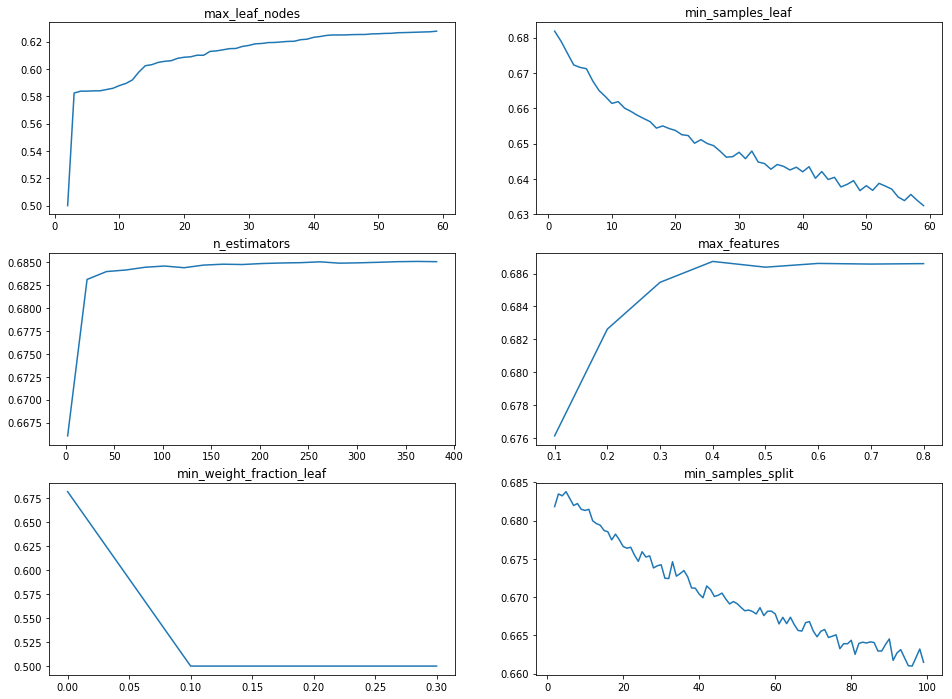

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

model_new = RandomForestClassifier(random_state=7)
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1

## Optimizing using Grid Search

In [ ]:
from sklearn.metrics import make_scorer

model1 = RandomForestClassifier()
# define the grid search parameters
param_grid = { 
    'n_estimators': [200, 210, 220, 230,240,250],
    "max_depth": [3,4,5],
    "min_samples_split": np.arange(0,5,1),
    "min_samples_leaf": np.arange(0,5,1),
    "max_leaf_nodes": np.arange(40,50,2),
    "min_weight_fraction_leaf": [0.0],
    "max_features": [0.4,0.5,0.6]
}

grid = GridSearchCV(estimator=model1, param_grid=param_grid, scoring=make_scorer(roc_auc_score))
grid_result = grid.fit(X_train, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#deatiled results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Building an optimized model

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=450,max_leaf_nodes = 40,max_depth=4,
                              min_samples_leaf=1,oob_score=True,
                               min_samples_split= 2, criterion='gini',
                              n_jobs=-1, random_state =7)

model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=40,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=450, n_jobs=-1, oob_score=True, random_state=7,
            verbose=0, warm_start=False)

In [120]:
#predicting

s_class = model.predict(X_test)


In [121]:
roc_auc_score(s_class, Y_test)


0.95689685821397164

In [75]:
#s1
s1_series = pd.Series(s1)
s1_series.to_csv('/resources/data/brainwaves/predict_fraudulant/pred_ensemble_nn123_rfop.csv', header=True)


## Removing unimportant features

In [85]:
model.feature_importances_

array([  2.42103e-01,   1.98964e-04,   8.41857e-05,   2.37712e-02,
         7.03380e-02,   6.74681e-02,   5.18670e-02,   4.31971e-03,
         4.68783e-02,   2.67675e-02,   5.56886e-03,   6.44770e-02,
         7.21632e-03,   2.40467e-03,   2.72312e-03,   1.16593e-04,
         5.08739e-03,   5.75633e-05,   1.62610e-03,   2.20477e-06,
         1.25427e-05,   6.28167e-05,   6.72506e-04,   1.48444e-04,
         0.00000e+00,   1.98258e-06,   9.07891e-03,   4.70919e-03,
         3.02500e-02,   4.72564e-03,   8.66432e-04,   2.64600e-02,
         3.78153e-02,   7.12154e-07,   1.51129e-01,   1.03379e-02,
         3.25475e-02,   6.81054e-02])

In [89]:
unimportant_features = ['cat_var_10', 'cat_var_11','cat_var_23','cat_var_25',
                        'cat_var_27', 'cat_var_28','cat_var_29', 'cat_var_3',
                        'cat_var_30', 'cat_var_32','cat_var_39','num_var_3',
                        'cat_var_9' ]


In [91]:
#dropping features
df.drop(unimportant_features, axis=1, inplace=True)
df_train =df.iloc[:348978,:]
df_test =df.iloc[348978:,:]

X = df_train.loc[:,['cat_var_1',
  'cat_var_12', 'cat_var_13', 'cat_var_14',
 'cat_var_15', 'cat_var_16', 'cat_var_17', 'cat_var_18', 'cat_var_19',
 'cat_var_2', 'cat_var_20', 'cat_var_21', 'cat_var_22', 
 'cat_var_24', 'cat_var_26',
 'cat_var_4', 'cat_var_5', 'cat_var_6', 'cat_var_7', 'num_var_1', 'num_var_2',
  'num_var_4', 'num_var_5', 'num_var_6', 'num_var_7']]

Y = df_train.loc[:, 'target']



ValueError: labels ['cat_var_10' 'cat_var_11' 'cat_var_23' 'cat_var_25' 'cat_var_27'
 'cat_var_28' 'cat_var_29' 'cat_var_3' 'cat_var_30' 'cat_var_32'
 'cat_var_39' 'num_var_3' 'cat_var_9'] not contained in axis

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=450,max_leaf_nodes = 40,max_depth=4,
                              min_samples_leaf=1,oob_score=True,
                               min_samples_split= 2, criterion='gini',
                              n_jobs=-1, random_state =7)

model.fit(X_train.drop(unimportant_features, axis=1,),Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=40,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=450, n_jobs=-1, oob_score=True, random_state=7,
            verbose=0, warm_start=False)

df_test.columns

## Validating


## Predicting

In [95]:
s=model.predict_proba(df_test.drop(['transaction_id', 'target'], axis=1))


array([[ 0.91911,  0.08089],
       [ 0.91097,  0.08903],
       ..., 
       [ 0.91392,  0.08608],
       [ 0.92315,  0.07685]])

In [97]:
c=0
s2=[]
for arr in s:
    s2.append(arr[1])
    c=c+1
s2


[0.080886747692928238,
 0.089034376550210015,
 0.08608051534806227,
 0.088822010479000221,
 0.069818307182496667,
 0.079711904302220971,
 0.079058481394524135,
 0.086108381274721896,
 0.10682523177673145,
 0.069788583891558939,
 0.069849350906896646,
 0.087633453461421595,
 0.072376762034892336,
 0.069818307182496667,
 0.10158361476981419,
 0.086139786730183909,
 0.077770495764998268,
 0.086108381274721896,
 0.069776497682810357,
 0.069782939669531918,
 0.081570880266435747,
 0.086108381274721896,
 0.079018895932351951,
 0.08608051534806227,
 0.080886747692928238,
 0.072880927075502505,
 0.069776497682810357,
 0.083407997024037187,
 0.079018895932351951,
 0.22514941603986102,
 0.079018895932351951,
 0.088822010479000221,
 0.069782939669531918,
 0.069776497682810357,
 0.080886747692928238,
 0.52429001744467119,
 0.078600809773957378,
 0.080886747692928238,
 0.069782939669531918,
 0.08608051534806227,
 0.069776497682810357,
 0.081570880266435747,
 0.093544430405131579,
 0.558447261956607

In [98]:
s2_series = pd.Series(s2)
s2_series.to_csv('/resources/data/brainwaves/predict_fraudulant/pred_fraud_oprf_dropf.csv', header=True)
